In [111]:
import numpy as np
np.random.seed(42)

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [113]:
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [114]:
print(f"Class names: {dataset.target_names}")

Class names: ['malignant' 'benign']


In [115]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [116]:
x = dataset.data
y = dataset.target

In [117]:
scaler = StandardScaler()
scaler.fit(x)
x_transformed = scaler.transform(x)

print(f"Mean:\n{scaler.mean_}")
print(f"Var:\n{scaler.var_}")
print(f"Samples seen: {scaler.n_samples_seen_}")

Mean:
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
Var:
[1.23970943e+01 1.84663974e+01 5.89402799e+02 1.23625903e+05
 1.97452073e-04 2.78428549e-03 6.34407875e-03 1.50301462e-03
 7.50222008e-04 4.97611152e-05 7.67671984e-02 3.03781123e-01
 4.08071149e+00 2.06579462e+03 8.99927022e-06 3.20139261e-04
 9.09596835e-04 3.80055080e-05 6.82128053e-05 6.98938631e-06
 2.33191693e+01 3.77100918e+01 1.12714643e+03 3.23597671e+05
 5.20403629e-04 2.47112650e-02 4.34475982e-02 4.31314711e-03
 3.82085668e-03 3.25636075e-04]
Samples seen: 569


In [118]:
print(f"data[0]:\n{dataset.data[0]}")
print(f"x[0]:\n{x[0]}")

data[0]:
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
x[0]:
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [119]:
n_components = 3
pca = PCA(n_components=n_components, copy=True)
pca.fit(x_transformed)
x_pca = pca.transform(x_transformed)

In [120]:
print("Components:\n", pca.components_)
print("Explained Variance: ", pca.explained_variance_)
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)
print("Sum of Explained Variance Ratio: ", sum(pca.explained_variance_ratio_))

Components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016537 -0.0347675   0.19034877  0.36657548 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.23271589  0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796412 -0.00825723  0.14188335  0.27533947]
 [-0.00853125  0.06454992 -0.00931423  0.02869953 -0.10429197 -0.07409159
   0.00273388 -0.02556349 -0.04023994 -0.02257403  0.26848139  0.37463366
   0.26664537  0.21600651  0.308839    0.15477961  0.17646372  0.22465759
   0.28858431  0.2115037

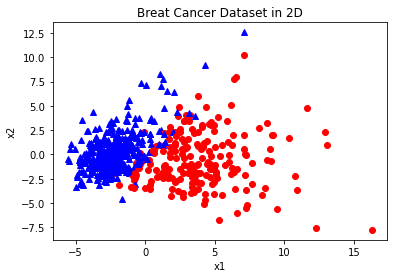

In [121]:
for index, point in enumerate(x_pca):
    if y[index] == 0:
        plt.plot(point[0], point[1], color="red", marker="o")
    else:
        plt.plot(point[0], point[1], color="blue", marker="^")
   
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Breat Cancer Dataset in 2D")
plt.show()

#### Programmieraufgabe

In [122]:
# Aufgabe 1:
# Find die Anzahl an Dimensionen, um 90% der Varianz "zu erklären"

for n_components in range(1, 29):
    pca = PCA(n_components=n_components, copy=True)
    pca.fit(x_transformed)
    explained_variance_ratio = sum(pca.explained_variance_ratio_)
    
    print(f"Sum of Explained Variance Ratio: {round(explained_variance_ratio, 4)} with: {n_components} components.")

    if explained_variance_ratio > 0.90:
        break
    else:  
        best_explained_variance_ratio = explained_variance_ratio

Sum of Explained Variance Ratio: 0.4427 with: 1 components.
Sum of Explained Variance Ratio: 0.6324 with: 2 components.
Sum of Explained Variance Ratio: 0.7264 with: 3 components.
Sum of Explained Variance Ratio: 0.7924 with: 4 components.
Sum of Explained Variance Ratio: 0.8473 with: 5 components.
Sum of Explained Variance Ratio: 0.8876 with: 6 components.
Sum of Explained Variance Ratio: 0.9101 with: 7 components.


In [123]:
# Aufgabe 2:
# Wende das gefundene Setup auf die Daten an

n_components = 7
pca = PCA(n_components=n_components, copy=True)
pca.fit(x_transformed)
x_pca = pca.transform(x_transformed)

In [124]:
# Aufgabe 3:
# Split das Dataset in ein Train and Testset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30)

In [125]:
# Aufgabe 4:
# Wende das KNN-Verfahren an
from sklearn.neighbors import KNeighborsClassifier

best_score = 0.0
for i in range(1, 11):
    n_neighbors = i
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(x_train, y_train)
    score = neigh.score(x_test, y_test)
    
    if score > best_score:
        best_score = score
        print("Score: ", score, " with: ", n_neighbors, " neighbors.")

Score:  0.9532163742690059  with:  1  neighbors.
Score:  0.9707602339181286  with:  2  neighbors.
Score:  0.9766081871345029  with:  6  neighbors.


In [126]:
# Aufgabe 5:
# Wende das KNN ohne Normalisierung und PCA an
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

best_score = 0.0
for i in range(1, 11):
    n_neighbors = i
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    neigh.fit(x_train, y_train)
    score = neigh.score(x_test, y_test)
    
    if score > best_score:
        best_score = score
        print("Score: ", score, " with: ", n_neighbors, " neighbors.")

Score:  0.9532163742690059  with:  1  neighbors.
Score:  0.9649122807017544  with:  3  neighbors.
